This notebook summarizes basic info related to Cambodia cluster-level MPI harmonized across 00, 05, 10, 14, and 21-22, including:

- Histogram of MPI
- Confidence Interval of Cluster MPI
- Data Missingness per Cluster
- Sample Size per Cluster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

In [2]:
code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
outfd_path = code_path.parent.parent / 'output'

In [3]:
country = 'khm'
spatial_res = 'clust'
version = 'hmn'
years = ['00', '05', '10', '14', '21-22']

In [4]:
# Read in data
dfs = []  # one dataframe for each year
for year in years:
    survey = f'{country}_dhs{year}'
    dfs.append(
        pd.read_csv(
            outfd_path / 'data' / f'mpi_{survey}_{version}_{spatial_res}_CI_mis.csv'
        )
    )

### Histogram of MPI

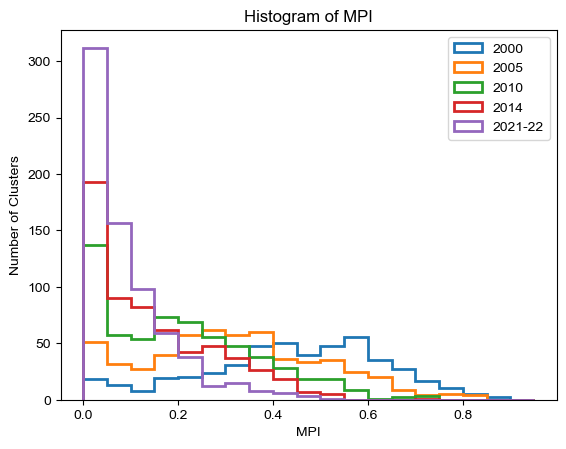

In [5]:
plt.figure()

for i, year in enumerate(years):
    plt.hist(
        dfs[i].mpi, bins=np.arange(0, 1, 0.05), 
        histtype='step', fill=False, linewidth=2, 
        label=f'20{year}'
    )

plt.legend()
plt.title('Histogram of MPI')
plt.xlabel('MPI')
plt.ylabel('Number of Clusters')
plt.show()

### CI of Cluster MPI

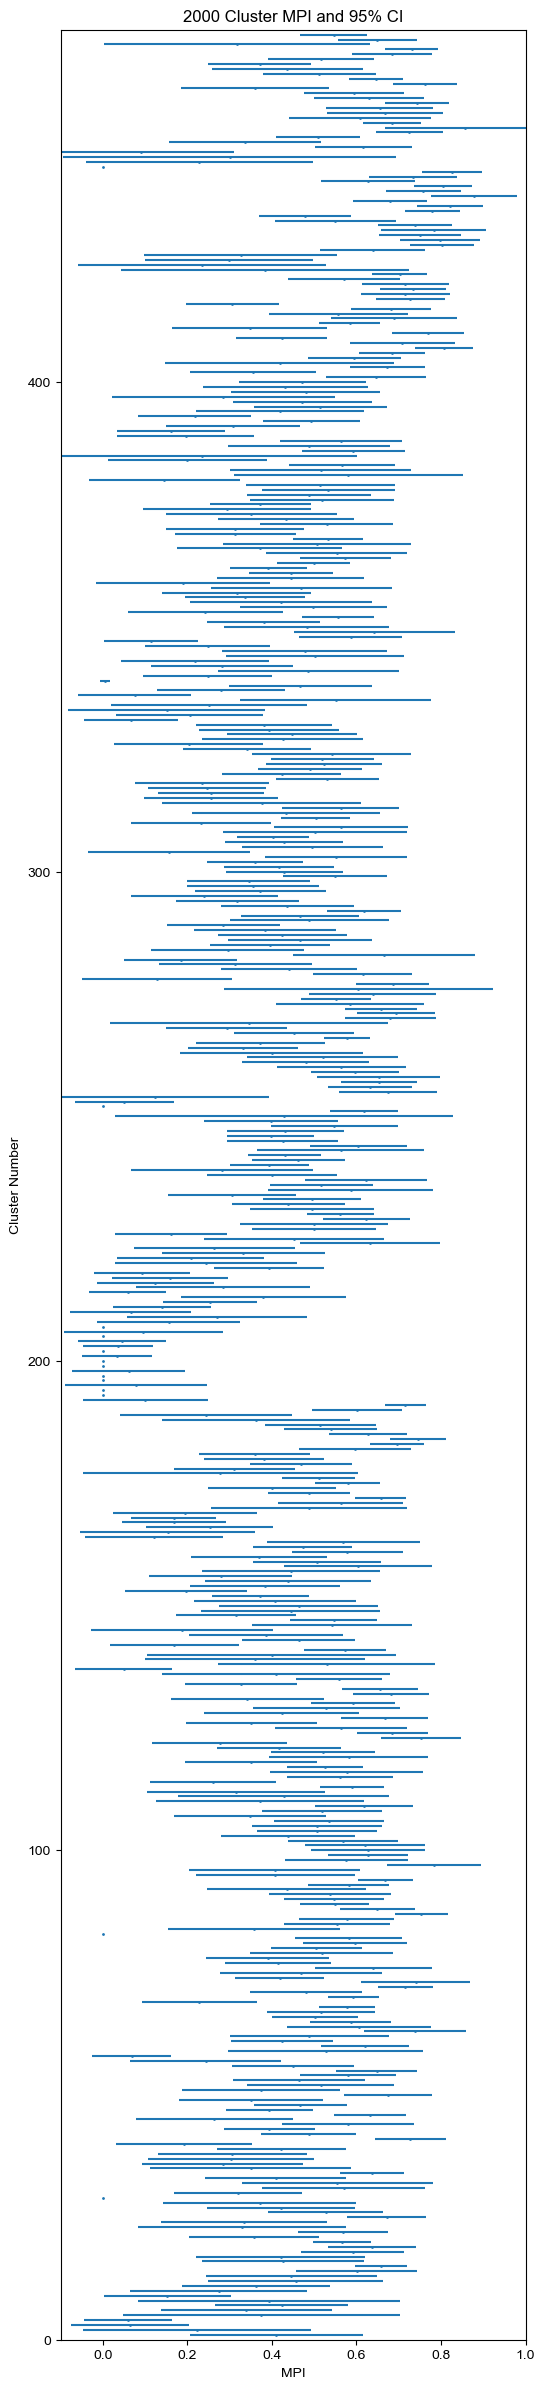

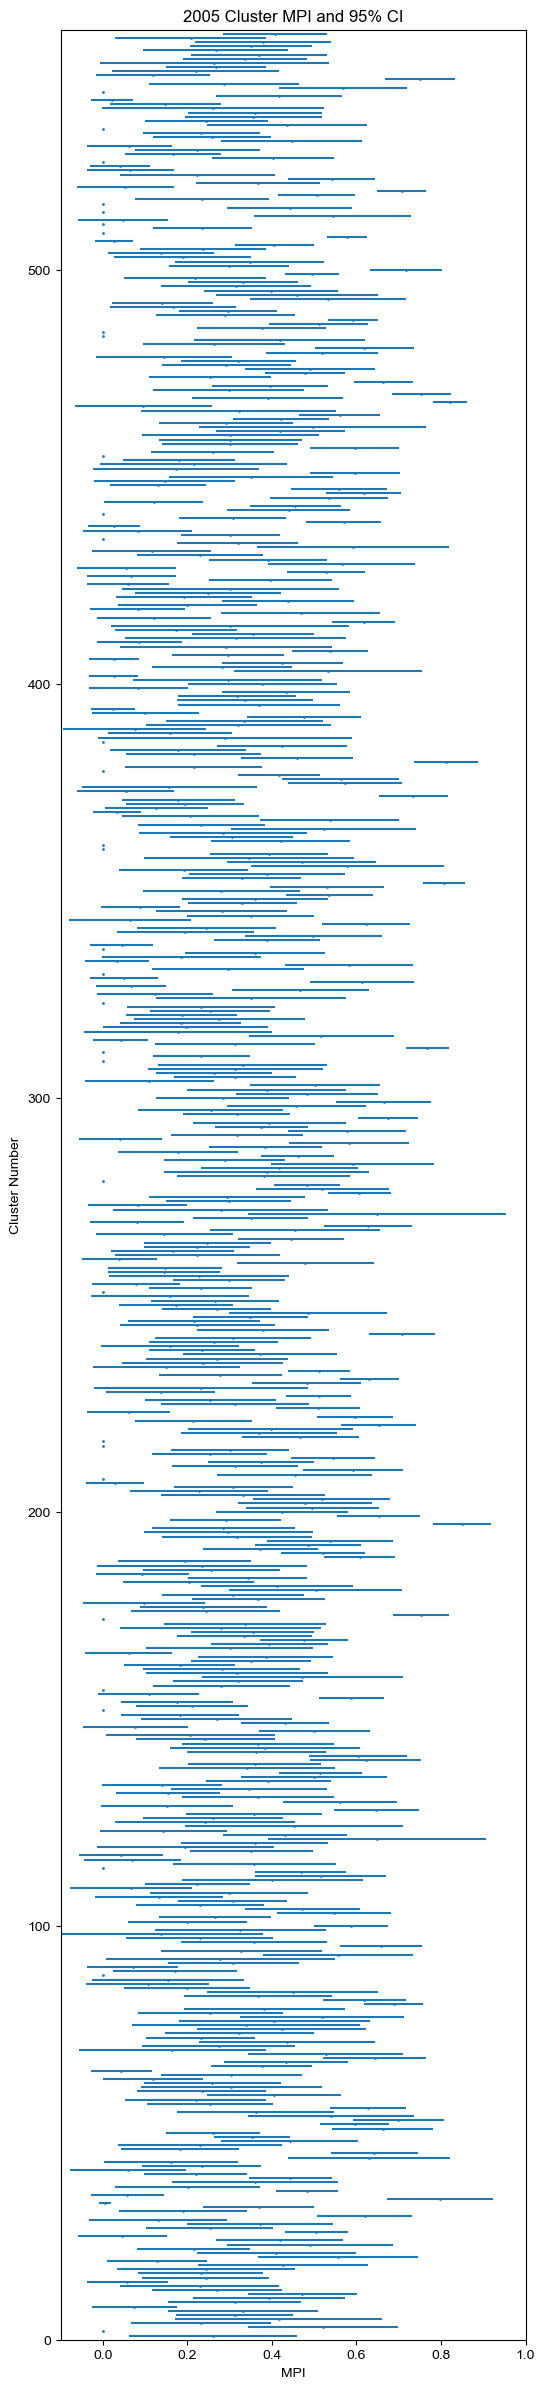

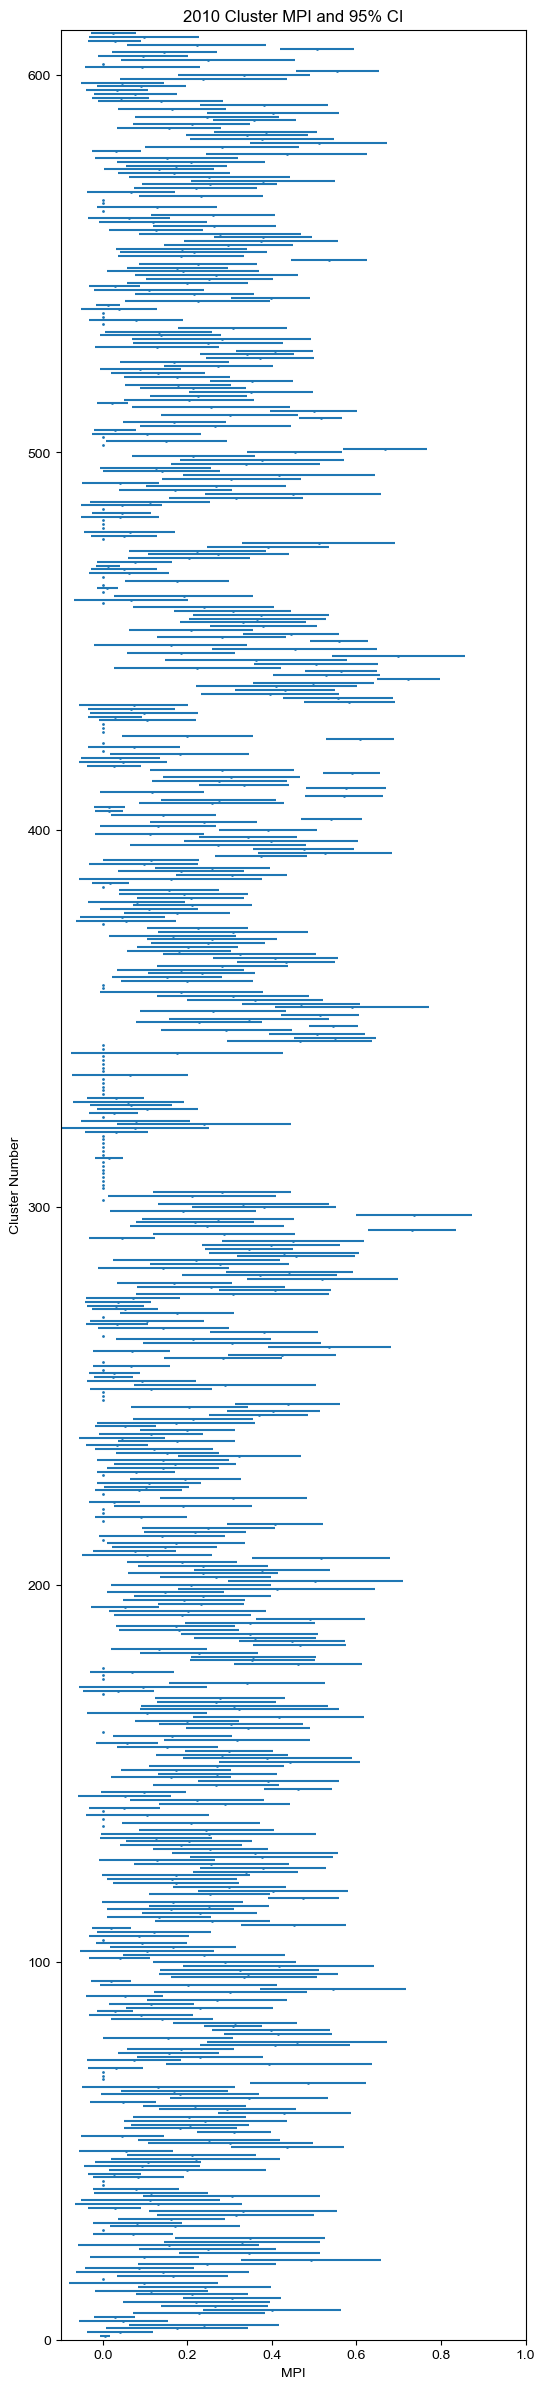

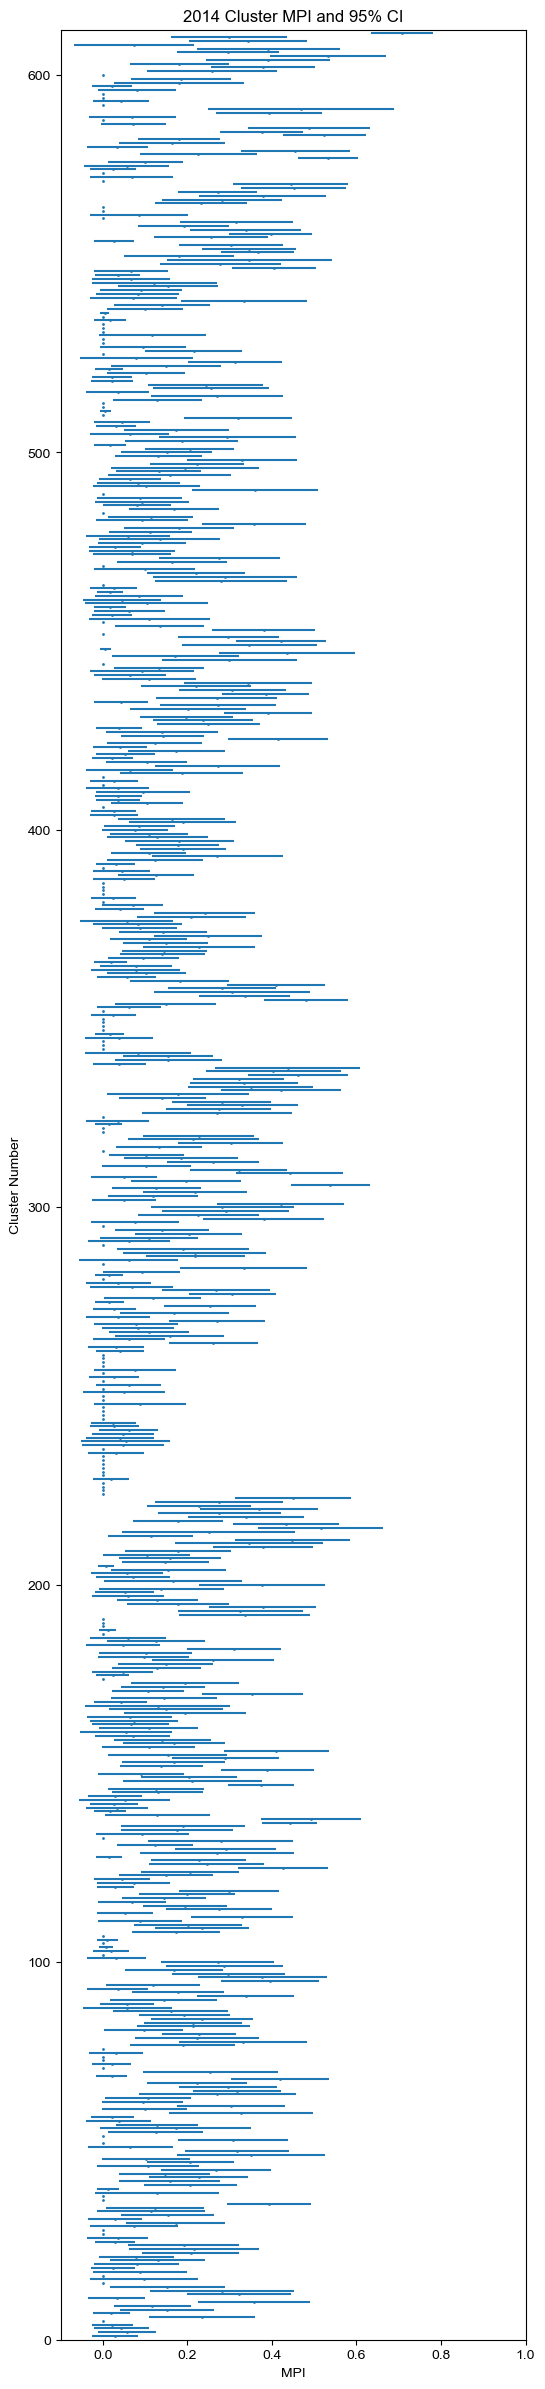

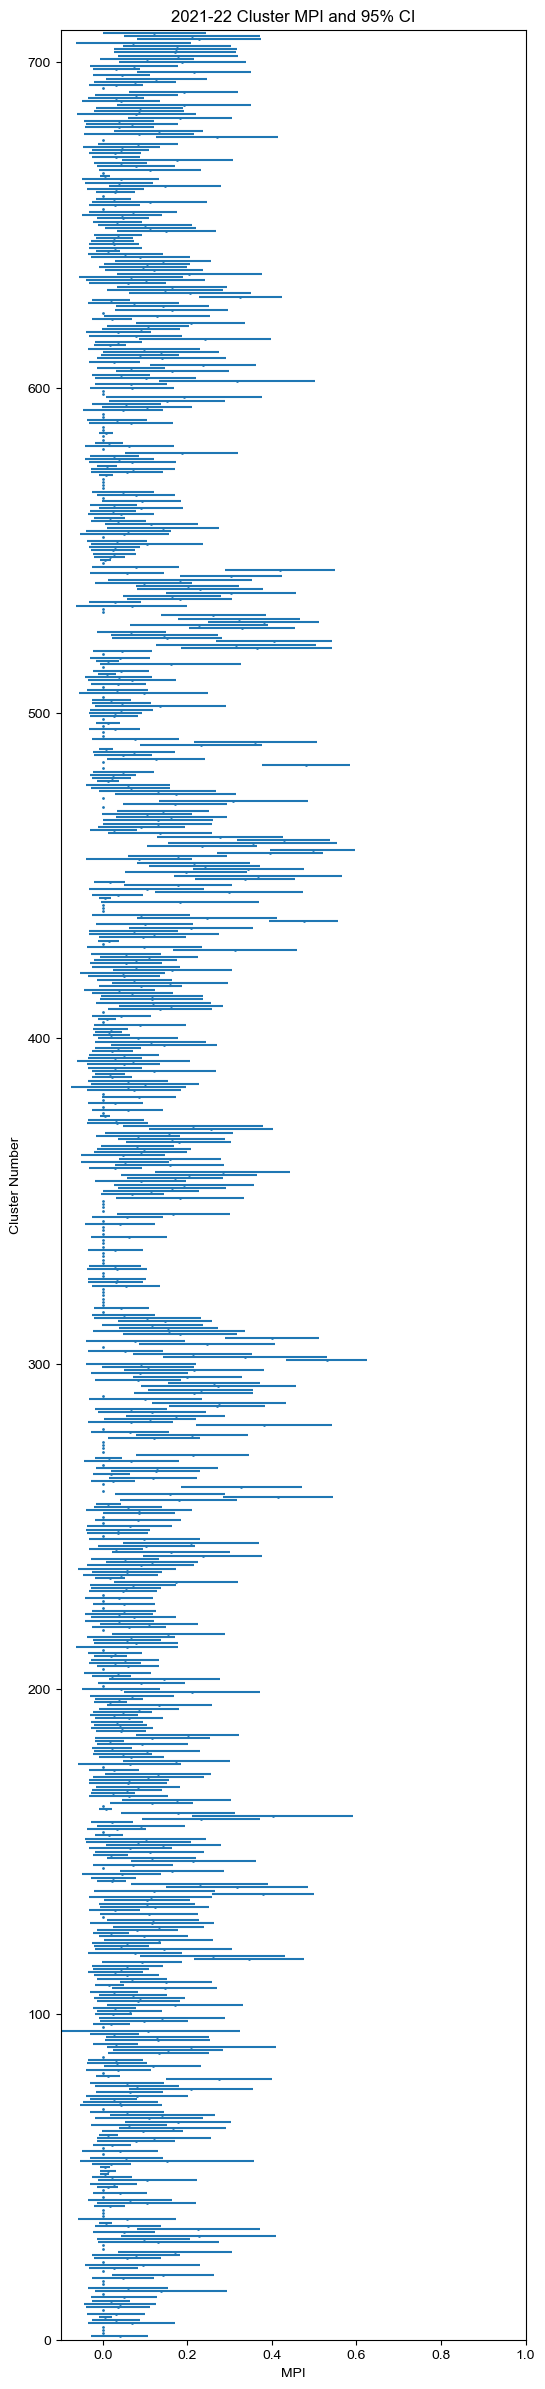

In [6]:
for i, year in enumerate(years):
    plt.figure(figsize=(6, 30))
    df = dfs[i]
    n_clust = df.shape[0]
    plt.scatter(data=df[:n_clust], x='mpi', y='clust_no', s=1)
    plt.hlines(
        data=df[:n_clust], y='clust_no', xmin='mpi_lo95CI', xmax='mpi_up95CI'
    )
    plt.ylim(0, n_clust + 1)
    plt.xlim(-0.1, 1)
    plt.title(f'20{year} Cluster MPI and 95% CI')
    plt.xlabel('MPI')
    plt.ylabel('Cluster Number')

### Data Missingness per Cluster

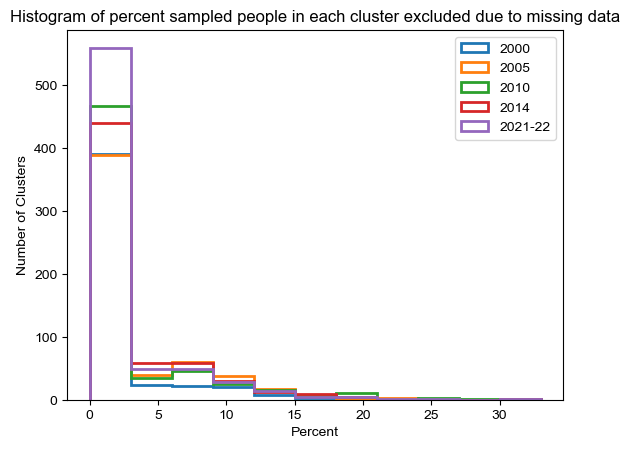

In [7]:
plt.figure()

for i, year in enumerate(years):
    plt.hist(
        dfs[i].pct_samp_ppl_mis, bins=np.arange(0, 35, 3), 
        histtype='step', fill=False, linewidth=2, 
        label=f'20{year}'
    )

plt.legend()
plt.title(
    'Histogram of percent sampled people in each cluster excluded due to missing data'
)
plt.xlabel('Percent')
plt.ylabel('Number of Clusters')
plt.show()

### Sample Size per Cluster

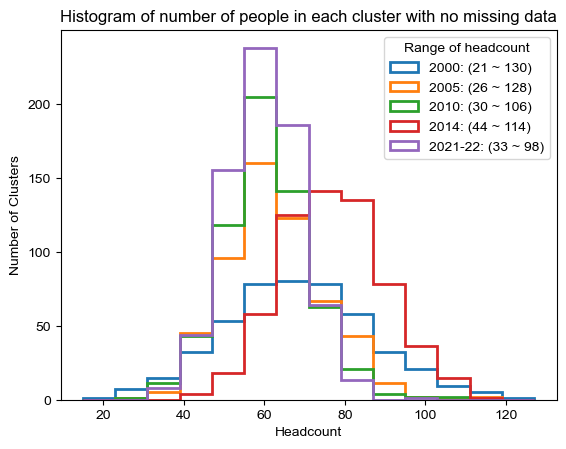

In [8]:
plt.figure()

for i, year in enumerate(years):
    df = dfs[i]

    n_ppl_no_mis_s = df.tot_samp_ppl * (100 - df.pct_samp_ppl_mis) / 100
    mini = int(n_ppl_no_mis_s.min())
    maxi = int(n_ppl_no_mis_s.max())

    plt.hist(
        n_ppl_no_mis_s, bins=np.arange(15, 135, 8), 
        histtype='step', fill=False, linewidth=2, 
        label=f'20{year}: ({mini} ~ {maxi})'
    )

plt.legend(title='Range of headcount')
plt.title(
    'Histogram of number of people in each cluster with no missing data'
)
plt.xlabel('Headcount')
plt.ylabel('Number of Clusters')
plt.show()